In [47]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Creating Random Dataset

In [48]:
def generate_random_dataset(size):
    x = []
    y = []
    target = []

    for i in range(size):
        
        # split into two different classes

        # class zero 
        x.append(np.round(random.uniform(0, 2.5), 1))
        y.append(np.round(random.uniform(0, 20), 1))
        target.append(0)

        # class one
        x.append(np.round(random.uniform(1, 5), 2))
        y.append(np.round(random.uniform(20, 25), 2))
        target.append(1)

        x.append(np.round(random.uniform(3, 5), 2))
        y.append(np.round(random.uniform(5, 25), 2))
        target.append(1)

    df_x = pd.DataFrame(data=x)
    df_y = pd.DataFrame(data=y)
    
    df_target = pd.DataFrame(data=target)
    
    data_frame = pd.concat([df_x, df_y], ignore_index=True, axis=1)
    data_frame = pd.concat([data_frame, df_target], ignore_index=True, axis=1)
    
    data_frame.columns = ['x', 'y', 'target']
    
    return data_frame

Generating Random Dataset

In [49]:
size = 100
dataset = generate_random_dataset(size)
features = dataset[['x', 'y']]
label = dataset['target']

Data Choosing / Holding - 30%

In [50]:
test_size = int(np.round(size * 0.3, 0))

Split and Train Dataset

In [51]:
x_train = features[:-test_size].values
y_train = label[:-test_size].values

x_test = features[-test_size:].values
y_test = label[-test_size:].values

Plotting The Training Dataset 

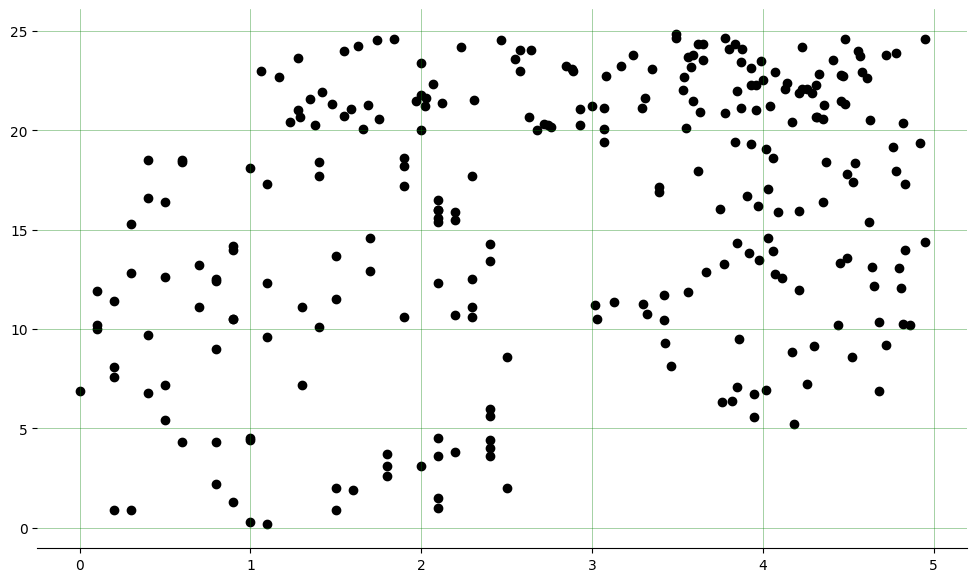

In [52]:
fig, ax = plt.subplots(figsize=(12, 7))

# removing top, left and right border of the graph
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# adding major gridlines
ax.grid(color='green', linestyle='-', linewidth=0.5, alpha=0.5)
ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], color="#000")

plt.show()

****Classification****

Fit an SVM with a Second-Degree Polynomial Kernel

In [53]:
from sklearn import svm
model = svm.SVC(kernel='poly', degree=2)
model.fit(x_train, y_train)

SVC(degree=2, kernel='poly')

Plotting Decision Boundary and Margins

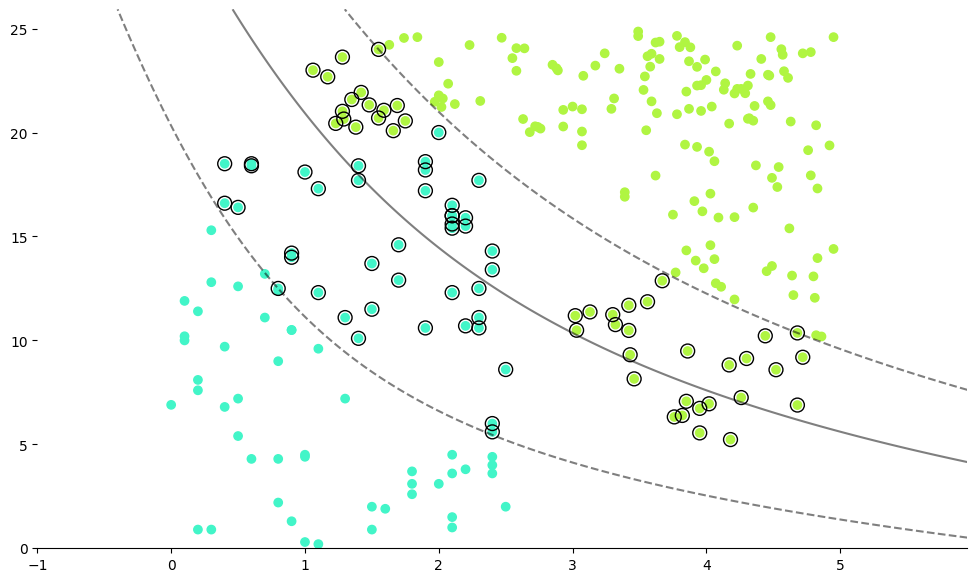

In [54]:
fig, ax = plt.subplots(figsize=(12, 7))

# removing top, left and right border of the graph
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# create grid to evaluate model
xx = np.linspace(-1, max(features['x']) + 1, len(x_train))
yy = np.linspace(0, max(features['y']) + 1, len(y_train))
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
train_size = len(features[:-test_size]['x'])

# assigning different colors to the classes
colors = y_train
colors = np.where(colors == 1, '#b0f542', '#42f5c8')

# plot the dataset
ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], c=colors)

# get the separating hyperplane
Z = model.decision_function(xy).reshape(XX.shape)
# Draw the decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# highlight support vectors with a circle around them
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')


plt.show()

**Accuracy of SVM Model** - Second Degree Polynomial Kernel

In [55]:
from sklearn.metrics import accuracy_score
predictions_poly = model.predict(x_test)
accuracy_poly = accuracy_score(y_test, predictions_poly)
print("\tSecond Degree Polynomial Kernel\n\n\tAccuracy of the SVM model (normalized): " + str(accuracy_poly))

	Second Degree Polynomial Kernel

	Accuracy of the SVM model (normalized): 0.8333333333333334


**Improving Accuracy** - Using Linear Kernel

Fit an SVM with a Linear Kernel

In [56]:
model = svm.SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

Plotting Decision Boundary and Margins

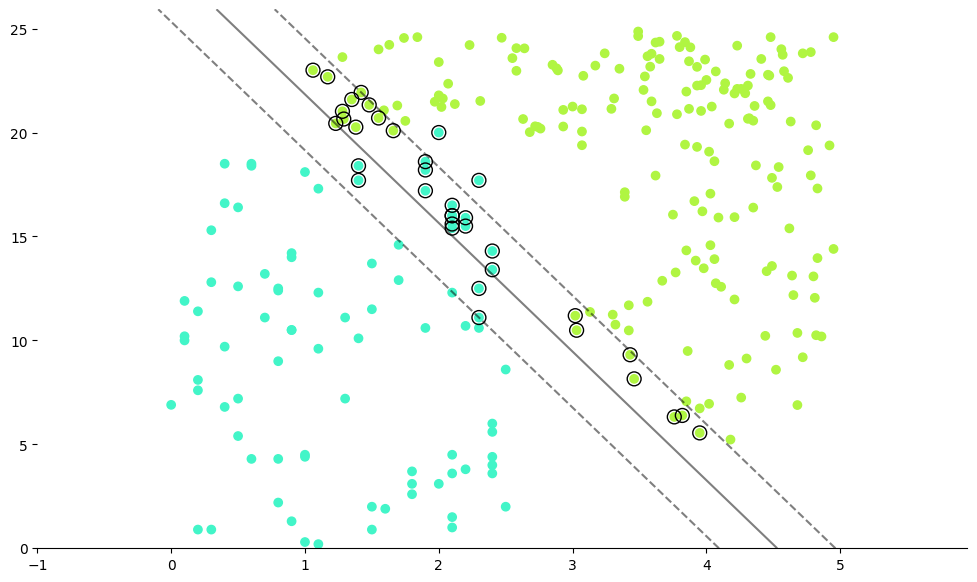

In [57]:
fig, ax = plt.subplots(figsize=(12, 7))

# removing top, left and right border of the graph
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# create grid to evaluate model
xx = np.linspace(-1, max(features['x']) + 1, len(x_train))
yy = np.linspace(0, max(features['y']) + 1, len(y_train))
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
train_size = len(features[:-test_size]['x'])

# assigning different colors to the classes
colors = y_train
colors = np.where(colors == 1, '#b0f542', '#42f5c8')

# plot the dataset
ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], c=colors)

# get the separating hyperplane
Z = model.decision_function(xy).reshape(XX.shape)
# Draw the decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# highlight support vectors with a circle around them
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')


plt.show()

**Accuracy of SVM Model** - Linear Kernel

In [59]:
from sklearn.metrics import accuracy_score
predictions_poly = model.predict(x_test)
accuracy_poly = accuracy_score(y_test, predictions_poly)
print("\tLinear Kernel\n\n\tAccuracy of the SVM model : " + str(accuracy_poly))

	Linear Kernel

	Accuracy of the SVM model : 0.9666666666666667
